In [52]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./dataset_phishing.csv")

In [3]:
data.head(5)

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [4]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [5]:
missing_percentage = data.isna().mean() * 100
print("Percentage of missing values in each column:")
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
print(sorted_missing_percentage)


Percentage of missing values in each column:
url                     0.0
longest_words_raw       0.0
ratio_extErrors         0.0
ratio_intErrors         0.0
ratio_extRedirection    0.0
                       ... 
punycode                0.0
ratio_digits_host       0.0
ratio_digits_url        0.0
https_token             0.0
status                  0.0
Length: 89, dtype: float64


In [6]:
data.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

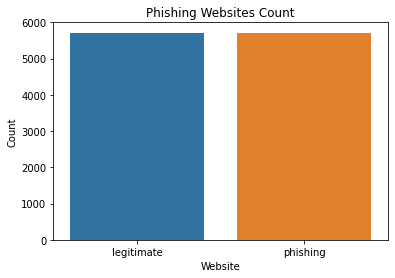

In [7]:
category_counts = data['status'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Phishing Websites Count')
plt.xlabel('Website')
plt.ylabel('Count')
plt.show()


In [8]:
data['target'] = np.where(data['status']=='legitimate',1,0)

In [9]:
data['target'].value_counts()

1    5715
0    5715
Name: target, dtype: int64

In [10]:
data1 = data.copy()
data1.drop(['url','status'],axis=1,inplace=True)

In [11]:
data1.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [12]:
correlation_matrix=pd.DataFrame(data1.corr()[['target']]).sort_values(by='target',ascending=False).fillna(0).reset_index().rename(columns={'index':'Features','target':'Correlation_Score'})

In [13]:
filtered=correlation_matrix[correlation_matrix['Correlation_Score']!=0]

In [14]:
positive=filtered[filtered['Correlation_Score']>0.1]['Features'].tolist()

In [15]:
negative=filtered[filtered['Correlation_Score']<-0.2]['Features'].tolist()

In [16]:
data2=pd.concat([data1[positive],data1[negative]],axis=1)

In [17]:
numeric_columns = data2.select_dtypes(include=['number']).columns.tolist()

In [18]:
data2.columns

Index(['target', 'page_rank', 'nb_www', 'nb_hyperlinks', 'domain_age',
       'ratio_intHyperlinks', 'ratio_intMedia', 'links_in_tags', 'safe_anchor',
       'domain_with_copyright', 'domain_registration_length',
       'ratio_extRedirection', 'external_favicon', 'ratio_extMedia',
       'nb_hyphens', 'longest_words_raw', 'nb_dots', 'empty_title',
       'tld_in_subdomain', 'longest_word_path', 'prefix_suffix',
       'shortest_word_host', 'ratio_digits_host', 'nb_eq', 'length_hostname',
       'nb_slash', 'length_url', 'nb_qm', 'ip', 'phish_hints',
       'domain_in_title', 'ratio_digits_url', 'google_index'],
      dtype='object')

In [19]:
fig = px.scatter_matrix(data2,
    dimensions=[ 'page_rank', 'nb_www', 'nb_hyperlinks', 'domain_age','ratio_intHyperlinks'],
    color='target')
fig.show()

In [20]:
fig = px.scatter_matrix(data2,
    dimensions=[ 'ratio_intMedia', 'links_in_tags', 'safe_anchor',
       'domain_with_copyright', 'domain_registration_length'],
    color='target')
fig.show()

In [21]:
fig = px.scatter_matrix(data2,
    dimensions=['ratio_extRedirection', 'external_favicon', 'ratio_extMedia',
       'nb_hyphens', 'longest_words_raw'],color='target')
fig.show()

In [22]:
fig = px.scatter_matrix(data2,
    dimensions=[ 'nb_dots', 'empty_title',
       'tld_in_subdomain', 'longest_word_path', 'prefix_suffix'],
    color='target')
fig.show()

In [23]:
fig = px.scatter_matrix(data2,
    dimensions=[ 'shortest_word_host', 'ratio_digits_host', 'nb_eq', 'length_hostname',
       'nb_slash', 'length_url'],
    color='target')
fig.show()

In [24]:
fig = px.scatter_matrix(data2,
    dimensions=['nb_qm', 'ip', 'phish_hints',
       'domain_in_title', 'ratio_digits_url', 'google_index'],
    color='target')
fig.show()

In [64]:
X = data1.copy()
Y = X.pop('target')
def model_all_features(modelname):
    kf = KFold(n_splits=5)
    if modelname=='Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'AdaBoost':
        print("Adaboost Model")
        model = AdaBoostClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    accuracies,precision,recall,f1score = [],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions, average='macro'))
    recall.append(recall_score(y_test, predictions, average='macro'))
    f1score.append(f1_score(y_test, predictions, average='macro'))
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of "+modelname +" Model", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of "+modelname +" Model", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of "+modelname +" Model", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of "+modelname +" Model", average_f1score)

In [65]:
model_all_features("Logistic")

Logistic Regression Model
Average Accuracy of Logistic Model 0.7887139107611548
Average Precision of Logistic Model 0.7886460866510054
Average Recall of Logistic Model 0.7888789299503585
Average F1 Score of Logistic Model 0.7886523967440457


In [66]:
model_all_features("RF")

Random Forest Model
Average Accuracy of RF Model 0.9711286089238845
Average Precision of RF Model 0.9710504549214227
Average Recall of RF Model 0.971180364037507
Average F1 Score of RF Model 0.9711087059926513


In [67]:
model_all_features('ExtraTrees')

Extra Trees Model
Average Accuracy of ExtraTrees Model 0.915573053368329
Average Precision of ExtraTrees Model 0.9154803841142691
Average Recall of ExtraTrees Model 0.9155405405405406
Average F1 Score of ExtraTrees Model 0.9155088822360449


In [68]:
model_all_features('AdaBoost')

Adaboost Model
Average Accuracy of AdaBoost Model 0.9501312335958005
Average Precision of AdaBoost Model 0.9503400181588408
Average Recall of AdaBoost Model 0.9498873873873874
Average F1 Score of AdaBoost Model 0.9500669850885368


In [69]:
model_all_features('SVM')

SVM Model
Average Accuracy of SVM Model 0.5879265091863517
Average Precision of SVM Model 0.6392081538393214
Average Recall of SVM Model 0.5960516639088068
Average F1 Score of SVM Model 0.5570004402404454


In [70]:
model_all_features('Scaled SVM')

Scaled SVM Model
Average Accuracy of Scaled SVM Model 0.9584426946631671
Average Precision of Scaled SVM Model 0.9583978397839783
Average Recall of Scaled SVM Model 0.9584206655635227
Average F1 Score of Scaled SVM Model 0.9584090688415421


In [71]:
X = data1.copy()
Y = X.pop('target')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))


[[1090   39]
 [  33 1124]]


Precision of Random Forest Model  0.9664660361134996
Recall of Random Forest Model  0.9714779602420052
F1 Score of Random Forest Model  0.9689655172413794
Accuracy of Random Forest Model  0.968503937007874


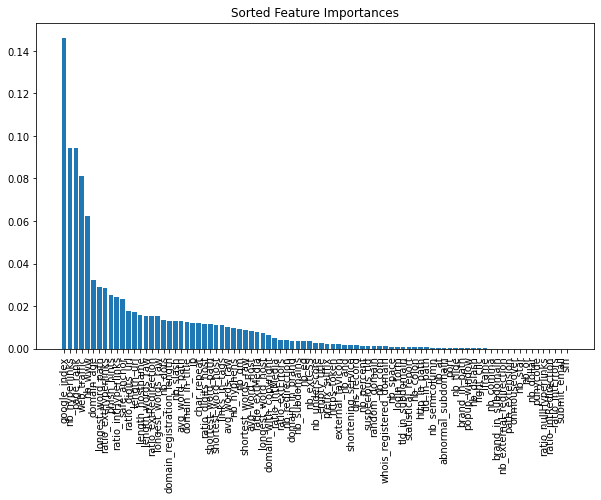

In [72]:
print("Precision of Random Forest Model ",precision_score(y_test,predictions))
print("Recall of Random Forest Model ",recall_score(y_test,predictions))
print("F1 Score of Random Forest Model ",f1_score(y_test,predictions))
print("Accuracy of Random Forest Model ",accuracy_score(y_test,predictions))
importances = model.feature_importances_
feature_importances = zip(X_train.columns, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
df_feature_importances = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.title("Sorted Feature Importances")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()

# With subset of Features

In [73]:
X = data2.copy()
Y = X.pop('target')

In [49]:
def model(modelname):
    kf = KFold(n_splits=5)
    if modelname=='Logistic':
        print("Logistic Regression Model")
        model = LogisticRegression(max_iter=10000)
    elif modelname == 'RF':
        print("Random Forest Model")
        model = RandomForestClassifier()
    elif modelname == 'ExtraTrees':
        print("Extra Trees Model")
        model = ExtraTreeClassifier()
    elif modelname == 'AdaBoost':
        print("Adaboost Model")
        model = AdaBoostClassifier()
    elif modelname == 'SVM':
        print("SVM Model")
        model = SVC(kernel='rbf')
    elif modelname == 'Scaled SVM':
        print("Scaled SVM Model")
        model = SVC(kernel='rbf')

    accuracies,precision,recall,f1score = [],[],[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        if modelname == 'Scaled SVM':
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, predictions))
    precision.append(precision_score(y_test, predictions, average='macro'))
    recall.append(recall_score(y_test, predictions, average='macro'))
    f1score.append(f1_score(y_test, predictions, average='macro'))
    average_accuracy = np.mean(accuracies)
    print("Average Accuracy of "+modelname +" Model", average_accuracy)
    average_precision = np.mean(precision)
    print("Average Precision of "+modelname +" Model", average_precision)
    average_recall = np.mean(recall)
    print("Average Recall of "+modelname +" Model", average_recall)
    average_f1score = np.mean(f1score)
    print("Average F1 Score of "+modelname +" Model", average_f1score)

In [43]:
model("Logistic")

Logistic Regression Model
Average Accuracy of Logistic Model 0.9326334208223972
Average Precision of Logistic Model 0.9325772200772201
Average Recall of Logistic Model 0.9325772200772201
Average F1 Score of Logistic Model 0.9325772200772201


c:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
model("RF")

Random Forest Model
Average Accuracy of RF Model 0.9667541557305337
Average Precision of RF Model 0.9666883168608036
Average Recall of RF Model 0.9667769810626954
Average F1 Score of RF Model 0.9667296826933682


In [45]:
model("ExtraTrees")

Extra Trees Model
Average Accuracy of ExtraTrees Model 0.9308836395450568
Average Precision of ExtraTrees Model 0.9308678395194164
Average Recall of ExtraTrees Model 0.9307754182754182
Average F1 Score of ExtraTrees Model 0.9308187713373337


In [46]:
model("AdaBoost")

Adaboost Model
Average Accuracy of AdaBoost Model 0.9457567804024497
Average Precision of AdaBoost Model 0.9457832156256898
Average Recall of AdaBoost Model 0.9456356867071153
Average F1 Score of AdaBoost Model 0.9457029175889722


In [47]:
model("SVM")

SVM Model
Average Accuracy of SVM Model 0.7344706911636045
Average Precision of SVM Model 0.7486743570120644
Average Recall of SVM Model 0.7377252252252252
Average F1 Score of SVM Model 0.7322324958052842


In [50]:
model("Scaled SVM")

Scaled SVM Model
Average Accuracy of Scaled SVM Model 0.9588801399825022
Average Precision of Scaled SVM Model 0.9588937076654305
Average Recall of Scaled SVM Model 0.9587952748667035
Average F1 Score of Scaled SVM Model 0.9588415475044897


# Feature Importance of Random Forest Model

In [74]:
X = data2.copy()
Y = X.pop('target')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[1089   40]
 [  38 1119]]


Precision of Random Forest Model  0.9654874892148404
Recall of Random Forest Model  0.9671564390665515
F1 Score of Random Forest Model  0.9663212435233162
Accuracy of Random Forest Model  0.9658792650918635


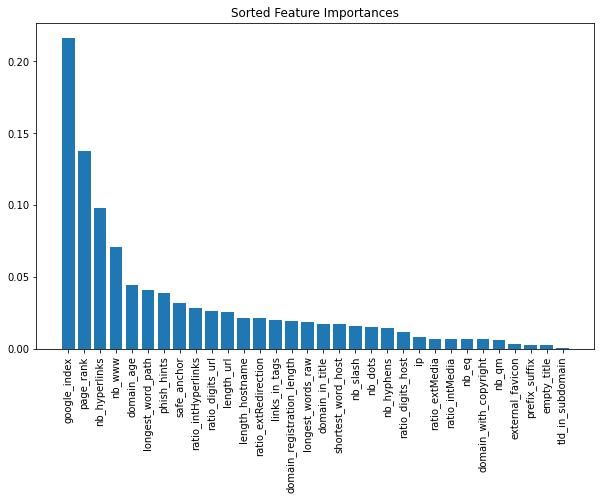

In [75]:
print("Precision of Random Forest Model ",precision_score(y_test,predictions))
print("Recall of Random Forest Model ",recall_score(y_test,predictions))
print("F1 Score of Random Forest Model ",f1_score(y_test,predictions))
print("Accuracy of Random Forest Model ",accuracy_score(y_test,predictions))
importances = model.feature_importances_
feature_importances = zip(X_train.columns, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
df_feature_importances = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
plt.figure(figsize=(10, 6))
plt.title("Sorted Feature Importances")
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xticks(rotation=90)
plt.show()